### Training a corpus-wide RMN with tfidf embeddings

In [1]:
import os
import sys
import pandas as pd

In [2]:
sys.path.append("/home/rocassius/w266_final/scripts/assembly")
sys.path.append("/home/rocassius/w266_final/scripts/modeling")

In [3]:
from document import load_generic_documents
from constant import DOC_GEN_PATH, MIN_SESSION, MAX_SESSION
from subject import subject_keywords
sessions = list(range(MIN_SESSION, MAX_SESSION+1))

In [4]:
from helper import load_pickled_object
from rmn import *
from rmn_data_generator import RMN_DataGenerator
from rmn_analyzer import RMN_Analyzer

In [5]:
from token_mapping import *
from keras_preprocessing.text import Tokenizer

In [6]:
# load embedding tools
prayer_tools_path = "/home/rocassius/gen-data/tools/prayer_tools"
generic_tools_path = "/home/rocassius/gen-data/tools/generic_tools"

metadata_dict = load_pickled_object(os.path.join(generic_tools_path, "metadata_dict"))
tokenizer_dict = load_pickled_object(os.path.join(generic_tools_path, "tokenizer_dict"))
embedding_matrix = load_pickled_object(os.path.join(generic_tools_path, "idf_embedding_matrix"))

global_embedding_matrix = load_pickled_object(os.path.join(prayer_tools_path, "embedding_matrix_wg"))
global_tokenizer_dict = load_pickled_object(os.path.join(prayer_tools_path, "tokenizer_dict_wg"))

In [7]:
docs_df = load_generic_documents(sessions, DOC_GEN_PATH)

In [8]:
docs_df.shape

(3913325, 9)

In [9]:
rmn = RigidRMN(dropout=0.5)
rmn.embedding_matrix = embedding_matrix
rmn.tokenizer_dict = tokenizer_dict
rmn.metadata_dict = metadata_dict
rmn.infer_embedding_matrix = global_embedding_matrix
rmn.infer_tokenizer_dict = global_tokenizer_dict
rmn.meta_embedding_dim = 50
rmn.num_topics = 100
rmn.build_model(gamma=0.1, theta=0., omega=.01, lamb=0.001, bias_reconstruct=False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [10]:
rmn.model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
speakerid.Input (InputLayer)    [(None, 1)]          0                                            
__________________________________________________________________________________________________
chamber.Input (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
state.Input (InputLayer)        [(None, 1)]          0                                            
__________________________________________________________________________________________________
gender.Input (InputLayer)       [(None, 1)]          0                                            
______________________________________________________________________________________________

In [11]:
data_df = docs_df

In [12]:
n_epochs = 2
n_folds = 10
fold_size = data_df.shape[0] // n_folds
index_folds = [list(range(i*fold_size, (i+1)*fold_size)) for i in range(n_folds)]

In [13]:
for _ in range(n_epochs):
    data_df = data_df.sample(frac=1)
    
    for fold in index_folds:
        g = RMN_DataGenerator(rmn=rmn, data_df=data_df.iloc[fold], batch_size=256)
        rmn.model.fit_generator(g, epochs = 1, use_multiprocessing=True, workers=10)

print("Success")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
  19/1528 [..............................] - ETA: 6:46 - loss: 0.2370

Process Keras_worker_ForkPoolWorker-142:
Process Keras_worker_ForkPoolWorker-150:
Process Keras_worker_ForkPoolWorker-147:
Process Keras_worker_ForkPoolWorker-148:
Process Keras_worker_ForkPoolWorker-141:
Process Keras_worker_ForkPoolWorker-143:
Process Keras_worker_ForkPoolWorker-145:
Process Keras_worker_ForkPoolWorker-144:
Process Keras_worker_ForkPoolWorker-146:
Process Keras_worker_ForkPoolWorker-149:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/rocassius/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/rocassius/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/rocassius/anaconda3/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/rocassius/anaconda3/lib/python3.7/multiprocessing/pro

KeyboardInterrupt
  File "/home/rocassius/anaconda3/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/rocassius/anaconda3/lib/python3.7/site-packages/keras_preprocessing/text.py", line 310, in texts_to_sequences_generator
    self.split)
  File "/home/rocassius/w266_final/scripts/modeling/rmn_data_generator.py", line 57, in __getitem__
    X, y = self.__data_generation(indices)
  File "/home/rocassius/w266_final/scripts/modeling/rmn_data_generator.py", line 57, in __getitem__
    X, y = self.__data_generation(indices)
  File "/home/rocassius/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/keras/utils/data_utils.py", line 571, in get_index
    return _SHARED_SEQUENCES[uid][i]
  File "/home/rocassius/anaconda3/lib/python3.7/site-packages/keras_preprocessing/text.py", line 61, in text_to_word_sequence
    return [i for i in seq if i]
  File "/home/rocassius/w266_final/scripts/modeling/rmn_data_generator.py",

  File "/home/rocassius/w266_final/scripts/modeling/rmn_data_generator.py", line 57, in __getitem__
    X, y = self.__data_generation(indices)
  File "/home/rocassius/w266_final/scripts/modeling/rmn_data_generator.py", line 43, in __data_generation
    return self.rmn.prep_X(self.data_df.loc[indices], for_training=True)
  File "/home/rocassius/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 1424, in __getitem__
    return self._getitem_axis(maybe_callable, axis=axis)
  File "/home/rocassius/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 1839, in _getitem_axis
    return self._getitem_iterable(key, axis=axis)
  File "/home/rocassius/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py", line 1135, in _getitem_iterable
    {axis: [keyarr, indexer]}, copy=True, allow_dups=True
  File "/home/rocassius/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 4577, in _reindex_with_indexers
    copy=copy,
  File "/home/rocassius/

KeyboardInterrupt: 

In [14]:
# data_generator = RMN_DataGenerator(rmn=rmn, data_df=docs_df.sample(1000000), batch_size=256)
# rmn.model.fit_generator(data_generator, 
#                         epochs = 3, 
#                         use_multiprocessing=True,                        
#                         workers=16)

In [15]:
local_models_path = "/home/rocassius/gen-data/models"

In [16]:
rmn.save_rmn("PoliteFinish", local_models_path)

In [17]:
df = data_df.sample(frac = 0.1)

In [44]:
from helper import pickle_object
from constant import DOCUMENT
import os
pickle_object(df, os.path.join("/home/rocassius/gen-data/doc/doc-generic/", DOCUMENT % 'sample'))

In [46]:
df

,speakerid,lastname,firstname,chamber,state,gender,party,document,session
49173,99108181,DANFORTH,JOHN,S,MO,M,R,Mr. President. 40 years ago. on March 5. 1946....,99
35189,77090940,BRADLEY,FREDERICK,H,MI,M,R,to our outlying possessions. Where are you goi...,77
60033,86106221,LONG,RUSSELL,S,LA,M,D,Mr. President. much has been said about a need...,86
26377,109120181,LEAHY,PATRICK,S,VT,M,D,Secretary of State is to determine whether the...,109
35541,88103451,JAVITS,JACOB,S,NY,M,R,Mr. President. I did want to make a point with...,88
...,...,...,...,...,...,...,...,...,...
82661,106115351,BIDEN,JOSEPH,S,DE,M,D,engaged in an activity described under section...,106
58971,97109161,HEFLIN,HOWELL,S,AL,M,D,itself in an unforeseenand I think you should ...,97
71373,99110610,MICHEL,ROBERT,H,IL,M,R,Mr. Chairman. I support the substitute. frankl...,99
60018,109113921,WARNER,JOHN,S,VA,M,R,international network. and the alQaida organiz...,109


In [18]:
analyzer = RMN_Analyzer(rmn, df)

In [19]:
analyzer.predict_topics()

In [20]:
analyzer.find_topic_nns()

/home/rocassius/w266_final/scripts/modeling/vector_math.py:34: RuntimeWarning: divide by zero encountered in true_divide
  Ds = np.dot(Wv, v) / (np.linalg.norm(v) * np.linalg.norm(Wv, axis = 1))
/home/rocassius/w266_final/scripts/modeling/vector_math.py:34: RuntimeWarning: invalid value encountered in true_divide
  Ds = np.dot(Wv, v) / (np.linalg.norm(v) * np.linalg.norm(Wv, axis = 1))



Topic 0
['applause', 'smile', 'loud', 'cheers', 'laugh', 'shouted', 'shouting', 'joking', 'waved', 'shout']

Topic 1
['improving', 'opportunities', 'integrating', 'improve', 'innovation', 'objectives', 'ensuring', 'goals', 'strategies', 'innovative']

Topic 2
['nomination', 'votes', 'nominees', 'nominations', 'nominee', 'candidates', 'nominated', 'polls', 'vote', 'election']

Topic 3
['examples', 'merely', 'describe', 'instances', 'example', 'abbāsābād', 'mentioned', 'instance', 'simple', 'penchant']

Topic 4
['guys', 'ital', "'re", 'wondering', 'dad', 'maybe', 'somebody', 'kids', 'getting', 'everybody']

Topic 5
['nicaragua', 'salvador', 'fidel', 'castro', 'dictatorship', 'junta', 'marxist', 'leftist', 'nicaraguan', 'regime']

Topic 6
['slap', 'give', 'get', 'lose', 'cut', 'try', 'grab', 'got', 'osgood', 'snap']

Topic 7
['o', 'q', 'l', 'h', 'k', 'n', 'w', 'e', 'p', 'na']

Topic 8
['commenting', 'listens', 'elaborating', 'interviewer', 'candidly', 'talk', 'specifics', 'news', 'listen


Topic 58
['disarmament', 'pyongyang', 'nuclear', 'proliferation', 'nonproliferation', 'progress', 'normalization', 'verifiable', 'diplomatic', 'normalizing']

Topic 59
['arable', 'tracts', 'lands', 'farmland', 'plantations', 'irrigated', 'reclaimed', 'encompassed', 'extensive', 'undeveloped']

Topic 60
['doubtful', 'jehovah', 'abbot', 'regard', 'heretics', 'hades', 'heracles', 'authorship', 'bishopric', 'unwilling']

Topic 61
['inflation', 'unemployment', 'slowdown', 'recession', 'decline', 'growth', 'rate', 'rise', 'slowing', 'gdp']

Topic 62
['river', 'reservoir', 'creek', 'lake', 'dam', 'basin', 'rivers', 'tributaries', 'drains', 'drainage']

Topic 63
['install', 'restaurant', 'rent', 'diners', 'restaurants', 'shop', 'starbucks', 'renting', 'installing', 'buy']

Topic 64
['injunction', 'patent', 'lawsuit', 'plaintiff', 'rulings', 'filed', 'lawsuits', 'supreme', 'appellate', 'court']

Topic 65
['research', 'institute', 'science', 'study', 'analysis', 'environmental', 'directorate', 

In [25]:
analyzer.topic_use()

99    0.016837
69    0.015089
54    0.015083
44    0.014789
76    0.014363
        ...   
59    0.005655
3     0.005119
9     0.004953
7     0.004697
60    0.003947
Length: 100, dtype: float32

In [26]:
analyzer.first_topic_counts()

99    7180
69    6416
44    6412
54    6353
50    6139
      ... 
3     1610
7     1550
43    1387
60     880
9      664
Length: 100, dtype: int64

In [27]:
import matplotlib.pyplot as plt

In [30]:
analyzer.find_topic_coherence()

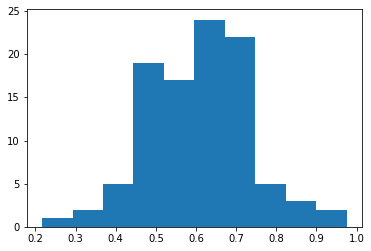

In [31]:
plt.hist(analyzer.topic_coherence)
plt.show()

In [37]:
analyzer.topic_coherence.mean()

0.6059101562500003

In [40]:
(analyzer.topic_coherence > 0.456).sum()

90

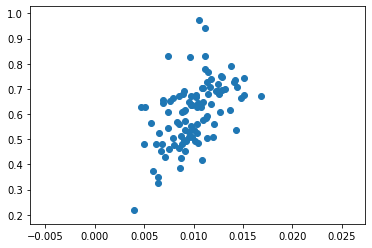

In [32]:
plt.scatter(analyzer.topic_use().sort_index(), analyzer.topic_coherence.sort_index())
plt.show()

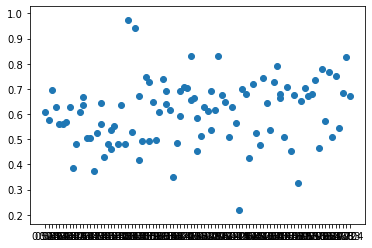

In [34]:
plt.scatter(analyzer.topic_nn_sim.sort_index(), analyzer.topic_coherence.sort_index())
plt.show()

In [36]:
analyzer.shannon_entropy().mean().round(3)

2.261

In [38]:
np.max(analyzer.topic_preds, axis=-1).mean()

0.5192861

In [47]:
analyzer.df

,speakerid,lastname,firstname,chamber,state,gender,party,document,session
0,99108181,DANFORTH,JOHN,S,MO,M,R,Mr. President. 40 years ago. on March 5. 1946....,99
1,77090940,BRADLEY,FREDERICK,H,MI,M,R,to our outlying possessions. Where are you goi...,77
2,86106221,LONG,RUSSELL,S,LA,M,D,Mr. President. much has been said about a need...,86
3,109120181,LEAHY,PATRICK,S,VT,M,D,Secretary of State is to determine whether the...,109
4,88103451,JAVITS,JACOB,S,NY,M,R,Mr. President. I did want to make a point with...,88
...,...,...,...,...,...,...,...,...,...
391327,106115351,BIDEN,JOSEPH,S,DE,M,D,engaged in an activity described under section...,106
391328,97109161,HEFLIN,HOWELL,S,AL,M,D,itself in an unforeseenand I think you should ...,97
391329,99110610,MICHEL,ROBERT,H,IL,M,R,Mr. Chairman. I support the substitute. frankl...,99
391330,109113921,WARNER,JOHN,S,VA,M,R,international network. and the alQaida organiz...,109


In [ ]:
analyzer.group_js(conditions={''}, n=10000)